In [14]:
from src.models.patch_mlp import PatchMLPModel, Game
from src.models.unet import UnetModel
from src.player import *
from src.utils import pyplot_game
import numpy as np
import matplotlib.pyplot as plt
import torch

In [15]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)
unet = UnetModel.load('weights/unet_16x30.pth', device)
patch = PatchMLPModel.load('weights/patch_mlp_7x7_1024.pth', device)
unet_player = ThresholdPlayer(unet, 0.01, 0.99)
patch_player = ThresholdPlayer(patch, 0.01, 0.99)

cpu


In [16]:
# 9 = closed cledd, 10 = flag
g = np.array([[
    [9,9,9,9,9,9,9,9,9],
    [9,10,4,2,2,9,9,1,9],
    [10,10,2,1,10,2,1,2,9],
    [2,2,1,2,2,2,0,2,9],
    [0,1,1,2,10,1,1,3,9],
    [0,1,10,2,1,2,3,10,9],
    [0,1,1,1,0,1,10,10,9],
]])

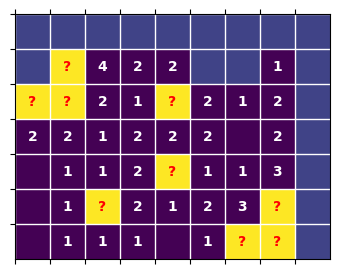

In [17]:
ax, s, h = pyplot_game(g[0], print_zeros=False)

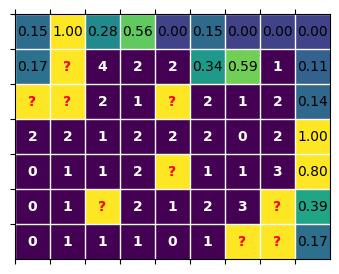

(<Axes: >, <matplotlib.image.AxesImage at 0x25953d1d4f0>, None)

In [18]:
p = patch(g, np.array([12]))
pyplot_game(g[0], mine_probs=p[0])

In [19]:
g = Game(n=1)
z = g.open_zero()

[ True]
[False]


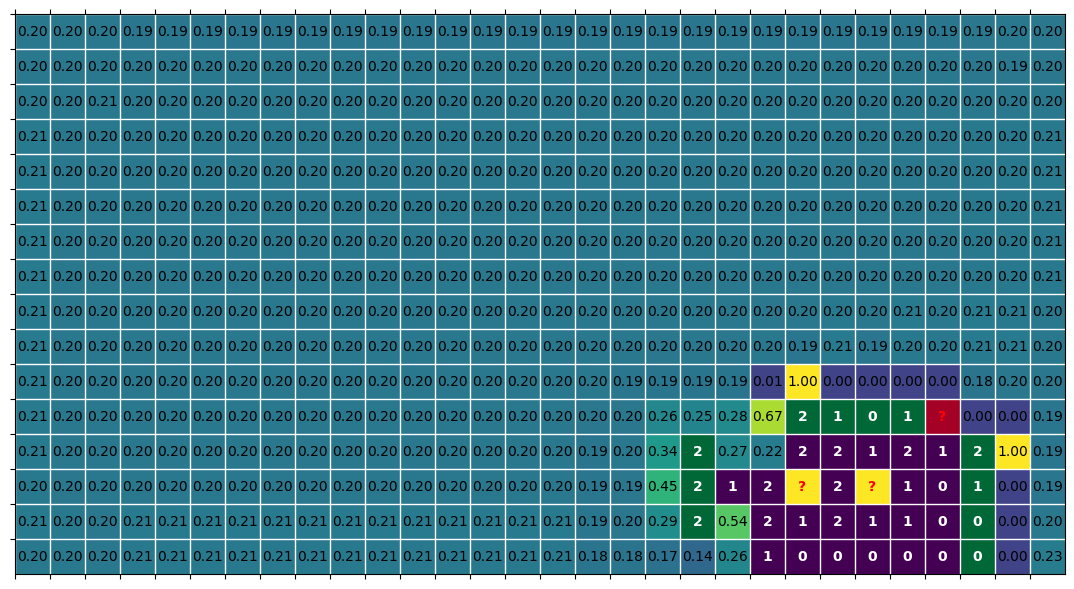

(<Axes: >,
 <matplotlib.image.AxesImage at 0x2596ca59910>)

In [20]:
t = patch_player.play(g, 5)
print(g.active_games)
print(g.won)
p = patch(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='last_moves', print_zeros= True, size=0.35) # highlight newly opened in red

[False]
[False]
[0.98687664]


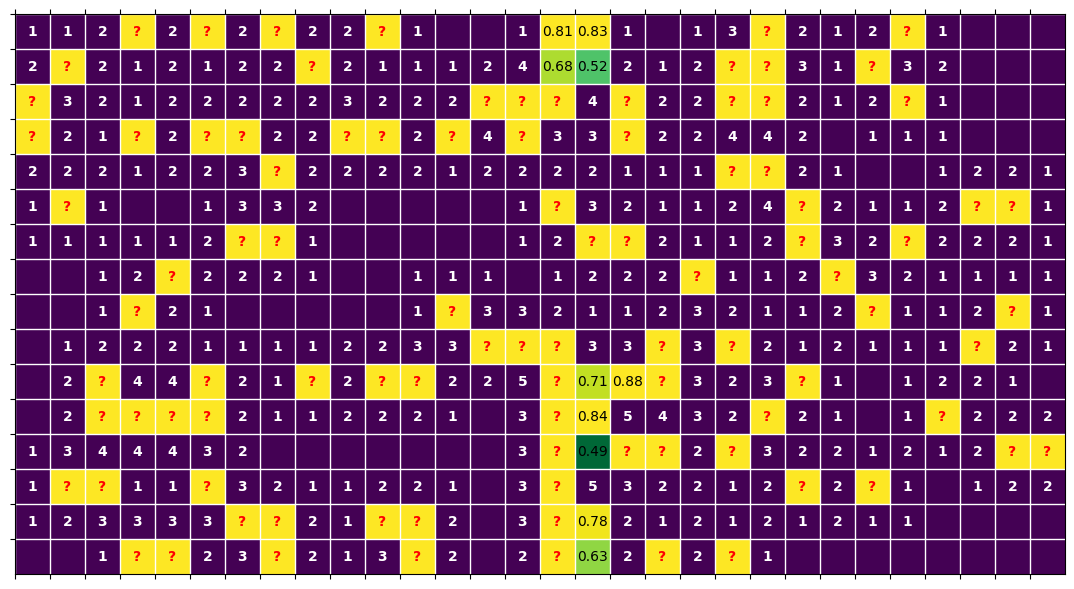

(<Axes: >,
 <matplotlib.image.AxesImage at 0x2596cd9c0e0>)

In [21]:
patch_player.play(g) # play untill the end
print(g.active_games)
print(g.won)
print(g.scores())
p = patch(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='losing', print_zeros=False)

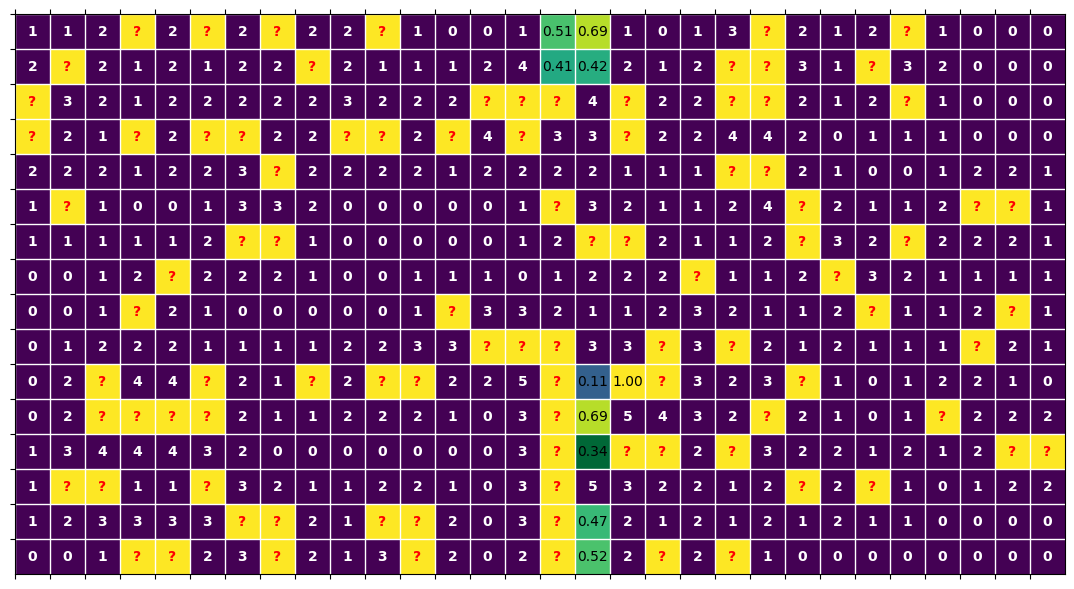

(<Axes: >,
 <matplotlib.image.AxesImage at 0x2596cd79490>)

In [22]:
p = unet(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='losing', print_zeros= True, size=0.35)

In [23]:
games = Game(16, 30, 99, 100)
zeros = games.open_zero()
patch_player.play(games)
print(f'patch: average score: {np.average(games.scores(final_only=True))}')
print(f'\twin rate: {games.win_rate()}')

patch: average score: 0.7522047244094489
	win rate: 0.36


In [24]:
games.reset()
games.move(zeros)
unet_player.play(games)
print(f'unet: average score: {np.average(games.scores(final_only=True))}')
print(f'\twin rate: {games.win_rate()}')

unet: average score: 0.829685039370079
	win rate: 0.42


In [25]:
g = Game(16, 30, 99, n=1)
_ = g.open_zero()

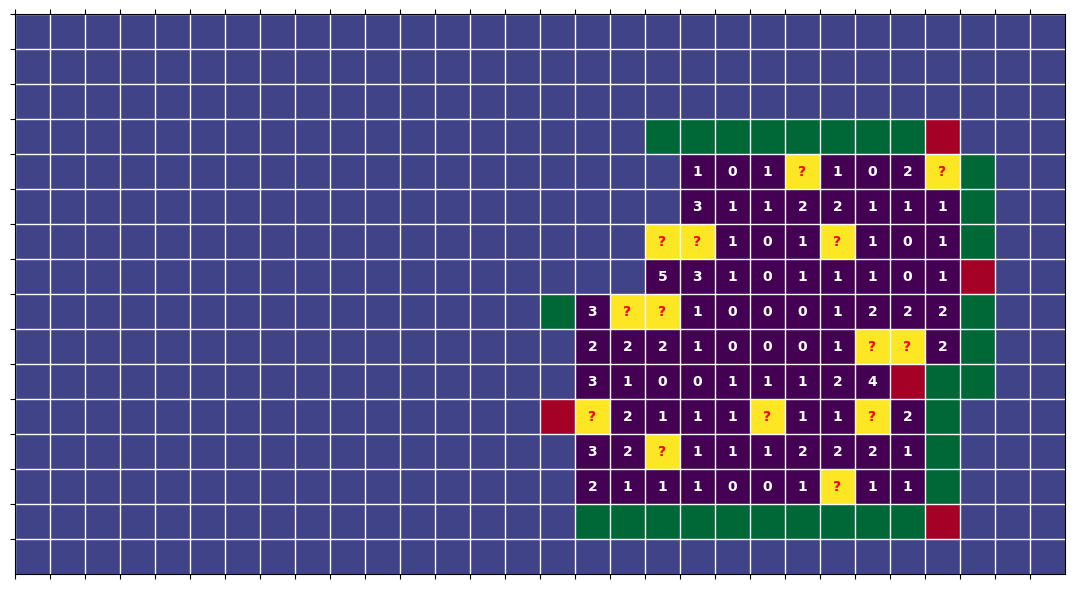

In [26]:

unet_player.play(g, 5)
unet_player.plot_moves(g)

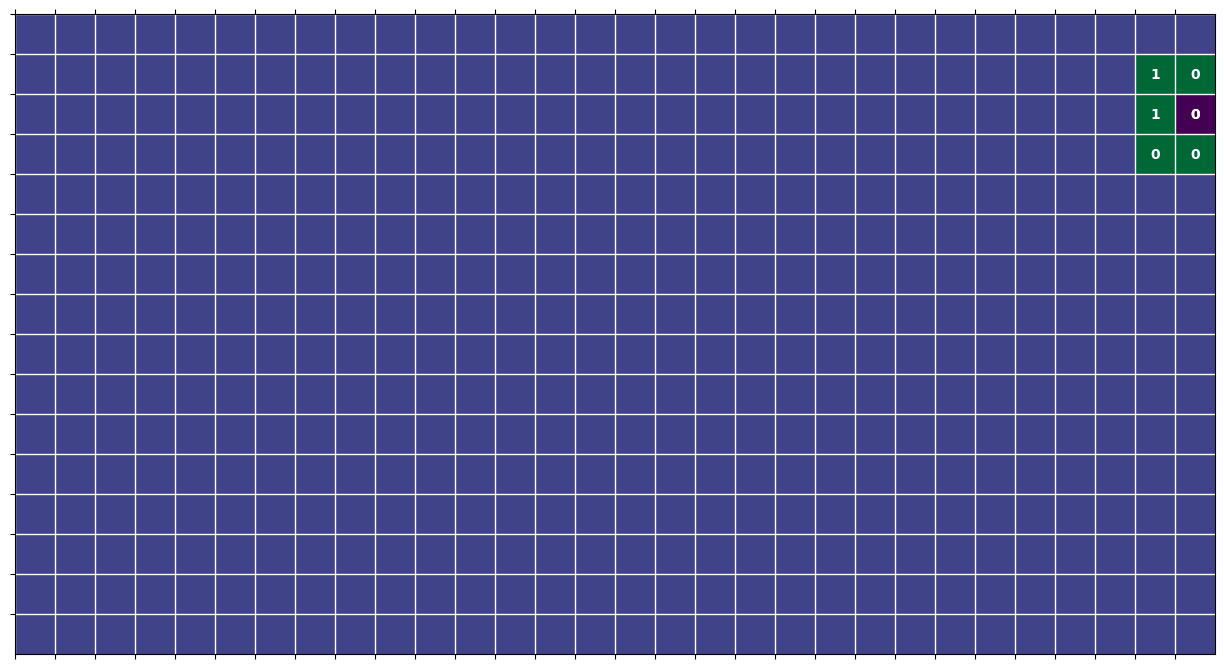

In [27]:
#%matplotlib widget
g = Game(16, 30, 99, n=1)
animation = GameAnimation(g, unet_player)
# plt.show()
# animation.animation.save('animation.gif')